<a href="https://colab.research.google.com/github/chrismartel/ECSE415-Project-G7/blob/main/dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Download Dataset**

In [2]:
# path to script to download dataset
%cd drive/MyDrive/McGill/WINTER2022/ECSE415/project/data


/content/drive/MyDrive/McGill/WINTER2022/ECSE415/project/data


In [ ]:
!bash download_dataset.sh

In [108]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import cv2 as cv

def parse(filepath):
  '''
      Parse gt.txt with format
        <frame>, <id>, <type>, <truncated>, <occluded>, <alpha>, <bb_left>, <bb_top>, <bb_right>, <bb_bottom>, <3D_H>, <3D_W>, <3D_L>, <x>, <y>, <z>, <ry>
      Return dict as:
        <type> = "Car", "Van", "Truck", "Pedastrian", "Person_sitting", "Cyclist", "Tram", "Misc", "DontCare"
        key: frame
        value: list - <id>, <bb_left>, <bb_top>, <bb_right>, <bb_bottom>, <is_vehicle>
      Feel free to edit your structure as needed!
  '''

  vehicle_types = ["Car", "Van", "Truck", "Tram"]

  lines = open(filepath, "r").readlines()                                 
  bbox_vehicle = {}
  bbox_all = {}

       #  <frame>, <id>, <truncated>, <occluded>, <alpha>, <bb_left>, <bb_top>, <bb_right>, <bb_bottom>, <3D_H>, <3D_W>, <3D_L>, <x>,   <y>,   <z>,   <ry>
  mask = [False,   True,  False,       False,      False,   True,      True,     True,       True,        False,  False,  False,  False, False, False, False]
  
  for line in lines:
    l = line.strip().split(' ') #convert line to list
    typ = l.pop(2)  # get type of bbox 
    line = np.asarray(l).astype(np.float32) # convert into array 
    frame, line = int(line[0]), line[mask] # get frame number and mask the line   
    if frame not in bbox_vehicle.keys():
      bbox_vehicle[frame] = []
    if frame not in bbox_all.keys():
      bbox_all[frame] = [] 
    if typ in vehicle_types:
      line = np.append(line,1)
      bbox_vehicle[frame].append(line)
    else:
      line = np.append(line,0)
    bbox_all[frame].append(line)

  return bbox_vehicle, bbox_all

def add_bbox(img, bbox, color=(255, 0, 0), thickness=2):
  ''' 
    annotate an image with bounding boxes:
    supports single bbox or list of bboxs
  '''

  annotated = np.copy(img)
  if bbox: 
    if isinstance(bbox[0], np.ndarray) or isinstance(bbox[0], list):
        for (id,x1,y1,x2,y2,is_v) in bbox:
            cv.rectangle(annotated, (int(x1), int(y1)), (int(x2), int(y2)), color , thickness)
    else:
        id,x1,y1,x2,y2,is_v = bbox
        cv.rectangle(annotated, (x1, y1), (x2, y2), color , thickness)
  
  return annotated

In [113]:
parse('dataset/0003.txt')[0][0]

[array([0.00000000e+00, 8.94768311e+02, 1.90650299e+02, 1.24100000e+03,
        3.74000000e+02, 1.00000000e+00]),
 array([  2.        , 292.43731689, 176.91368103, 331.77728271,
        197.46696472,   1.        ])]

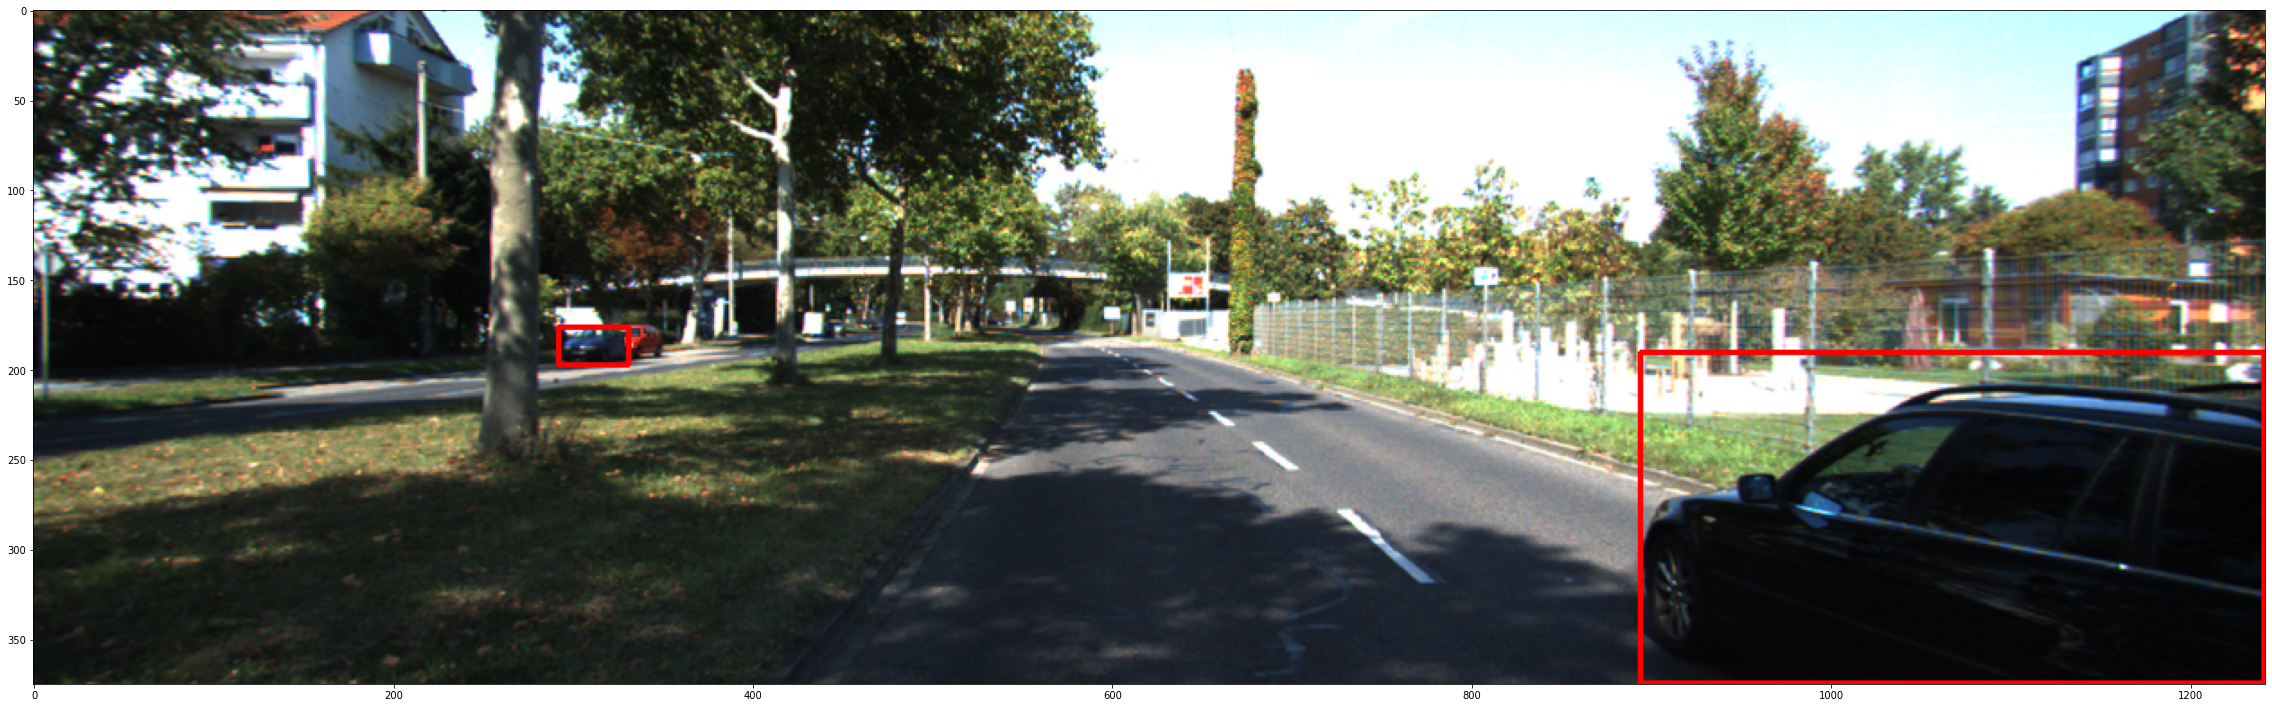

In [114]:
img = cv.imread("dataset/0003/000000.png")
img = cv.cvtColor(img, cv.COLOR_BGR2RGB)

plt.figure(figsize=(40, 20))
plt.imshow(add_bbox(img, parse('dataset/0003.txt')[0][0]))
plt.show()